In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Stroke prediction using two models SVM and DecisionTreeClassifier, to check which model gives better prediction

# Importing required libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [3]:
stroke = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [4]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Dropping unrequired column

In [5]:
strokes = stroke.drop('id', axis=1)

In [6]:
strokes.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Checking unique values for certain columns

In [7]:
strokes['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [8]:
strokes['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
strokes['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
strokes['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [11]:
strokes['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

# Plotting Countplots

<AxesSubplot:xlabel='gender', ylabel='count'>

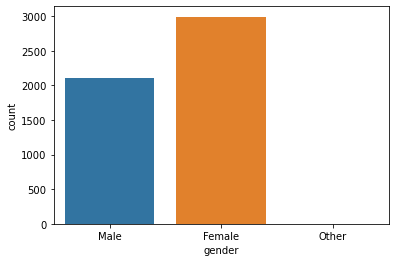

In [12]:
sns.countplot(x = strokes['gender'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

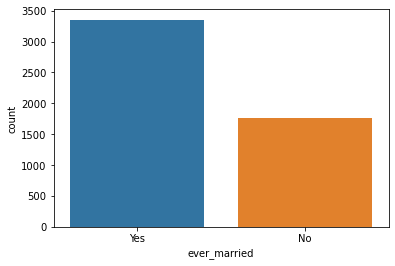

In [13]:
sns.countplot(x = strokes['ever_married'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

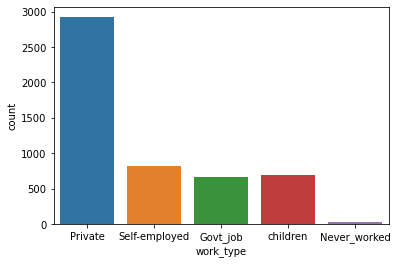

In [14]:
sns.countplot(x = strokes['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

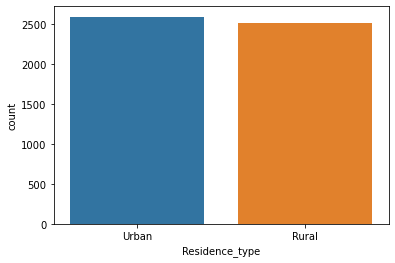

In [15]:
sns.countplot(x = strokes['Residence_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

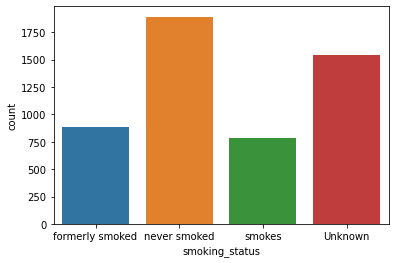

In [16]:
sns.countplot(x = strokes['smoking_status'])

# Filling null values

In [17]:
strokes['bmi'].fillna(strokes['bmi'].mean(), inplace = True)

In [18]:
strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Dividing data into x and y

In [19]:
x = strokes.iloc[:,:-1]
y = strokes.iloc[:,-1]

# Using One Hot Encoding

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[  0.           1.           0.         ...   1.         228.69
   36.6       ]
 [  1.           0.           0.         ...   0.         202.21
   28.89323691]
 [  0.           1.           0.         ...   1.         105.92
   32.5       ]
 ...
 [  1.           0.           0.         ...   0.          82.99
   30.6       ]
 [  0.           1.           0.         ...   0.         166.29
   25.6       ]
 [  1.           0.           0.         ...   0.          85.28
   26.2       ]]


# Splitting dataset into training and testing data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

# Scaling data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [26]:
x_train_1 = sc.fit_transform(x_train)

In [27]:
x_test_1 = sc.fit_transform(x_test)

# Using SVM

In [28]:
from sklearn.svm import SVC

In [29]:
classifier = SVC(random_state = 0, kernel = 'linear')

In [30]:
classifier.fit(x_train_1, y_train)

SVC(kernel='linear', random_state=0)

In [31]:
y_pred = classifier.predict(x_test_1)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1203    0]
 [  75    0]]


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
acc = accuracy_score(y_test, y_pred)
acc

0.9413145539906104

# Using Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dc = DecisionTreeClassifier(criterion = 'entropy')

In [38]:
dc.fit(x_train_1, y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
pred = dc.predict(x_test_1)

In [40]:
cm1 = confusion_matrix(y_test, pred)
print(cm1)

[[1143   60]
 [  64   11]]


In [41]:
acc1 = accuracy_score(y_test, pred)
acc1

0.9029733959311425

[Text(202.7256850473613, 531.2454545454545, 'X[16] <= 0.585\nentropy = 0.267\nsamples = 3832\nvalue = [3658, 174]'),
 Text(45.21008119079838, 506.53636363636366, 'X[16] <= 0.054\nentropy = 0.098\nsamples = 2615\nvalue = [2582, 33]'),
 Text(16.611637347767253, 481.82727272727277, 'X[20] <= -0.655\nentropy = 0.035\nsamples = 1887\nvalue = [1880, 7]'),
 Text(13.591339648173207, 457.1181818181818, 'entropy = 0.0\nsamples = 738\nvalue = [738, 0]'),
 Text(19.6319350473613, 457.1181818181818, 'X[14] <= 0.278\nentropy = 0.054\nsamples = 1149\nvalue = [1142, 7]'),
 Text(16.611637347767253, 432.40909090909093, 'X[19] <= -1.048\nentropy = 0.085\nsamples = 656\nvalue = [649, 7]'),
 Text(6.040595399188092, 407.70000000000005, 'X[19] <= -1.056\nentropy = 0.619\nsamples = 13\nvalue = [11, 2]'),
 Text(3.020297699594046, 382.9909090909091, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(9.060893098782138, 382.9909090909091, 'X[0] <= -0.168\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(6.040

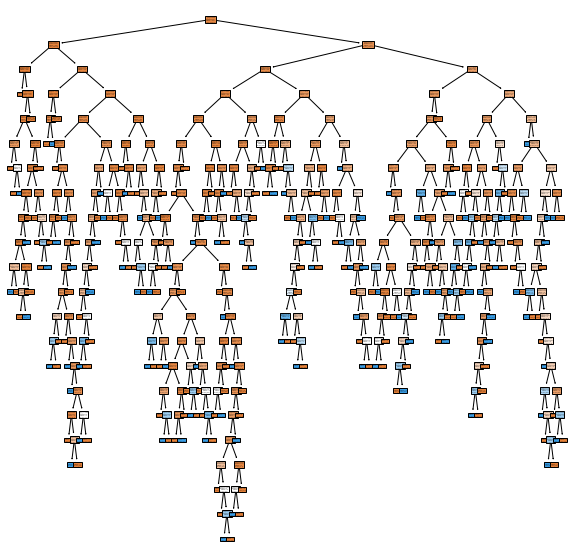

In [42]:
import sklearn
fig = plt.figure(figsize = (10,10))
sklearn.tree.plot_tree(dc, filled = True)